<a href="https://colab.research.google.com/github/YashwanthV1232003/Plant-disease/blob/main/efficientnet-99.82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install tensorflow==2.9.1
import tensorflow as tf

In [6]:
import pandas as pd
import numpy as np

In [9]:
!pip install opendatasets

In [12]:
import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashv2003
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [02:11<00:00, 22.0MB/s]


In [11]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')


Training Folder


In [13]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')


Testing Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,502 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy
There are 0 directories,490 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directories,425 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot
There are 0 directories,432 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___healthy
There are 0 directories,445 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)

In [20]:


from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard-data-server
    Fou

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [21]:
train_data,test_data

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [22]:


class_names = train_data.class_names
class_names



['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

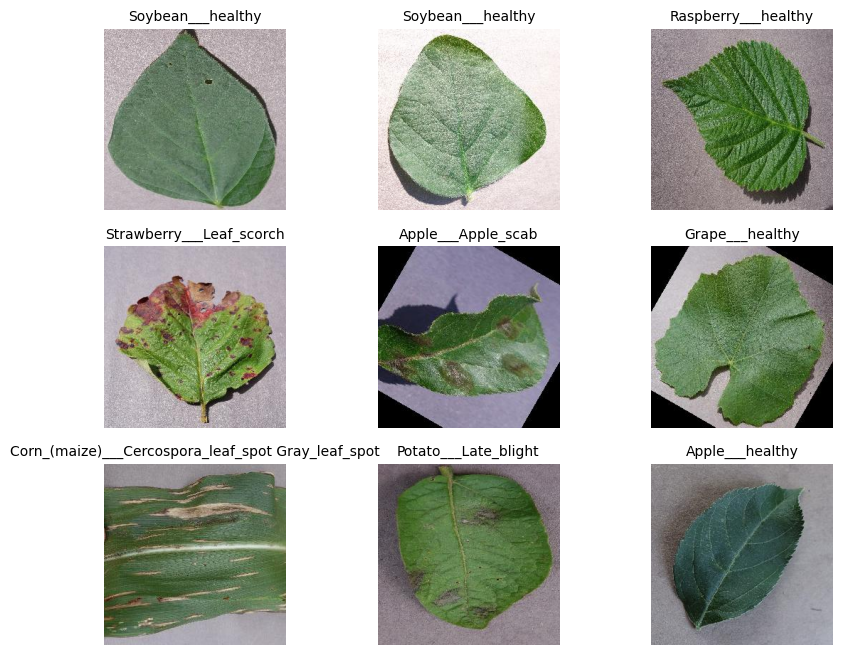

In [24]:

plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)


In [25]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')

16705208/16705208 [==============================] - 2s 0us/step


In [26]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [27]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [28]:
feature_model.summary()

Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 GlobalAveragePooling2D_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 4098249 (15.63 MB)
Trainable params: 1399638 (5.34 MB)
Non-trainable params: 2698611 (10.29 MB)
___

In [29]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")

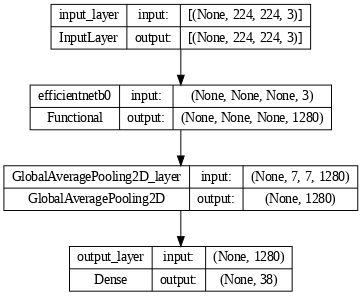

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(feature_model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

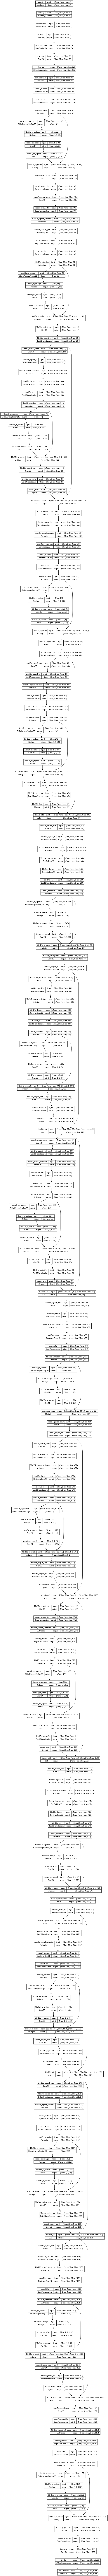

In [32]:
plot_model(base_model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [33]:
initial_epochs = 100

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010')])


Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20240107-054248
Epoch 1/100
2197/2197 [==============================] - 224s 94ms/step - loss: 0.1395 - accuracy: 0.9574 - val_loss: 0.0492 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 2/100
2197/2197 [==============================] - 197s 90ms/step - loss: 0.0421 - accuracy: 0.9861 - val_loss: 0.0588 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 3/100
2197/2197 [==============================] - 198s 90ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0288 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 4/100
2197/2197 [==============================] - 200s 91ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0242 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 5/100
2197/2197 [==============================] - 200s 91ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0202 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 6/100
2197/2197 [==============================] - 198s 90ms/step - loss: 0.0169 - accuracy: 0.9945 - v

In [34]:

feature_model.load_weights(checkpoint_path)

In [35]:
feature_model.evaluate(test_data)


550/550 [==============================] - 37s 66ms/step - loss: 0.0072 - accuracy: 0.9982


[0.007197520229965448, 0.9981788992881775]

In [36]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')

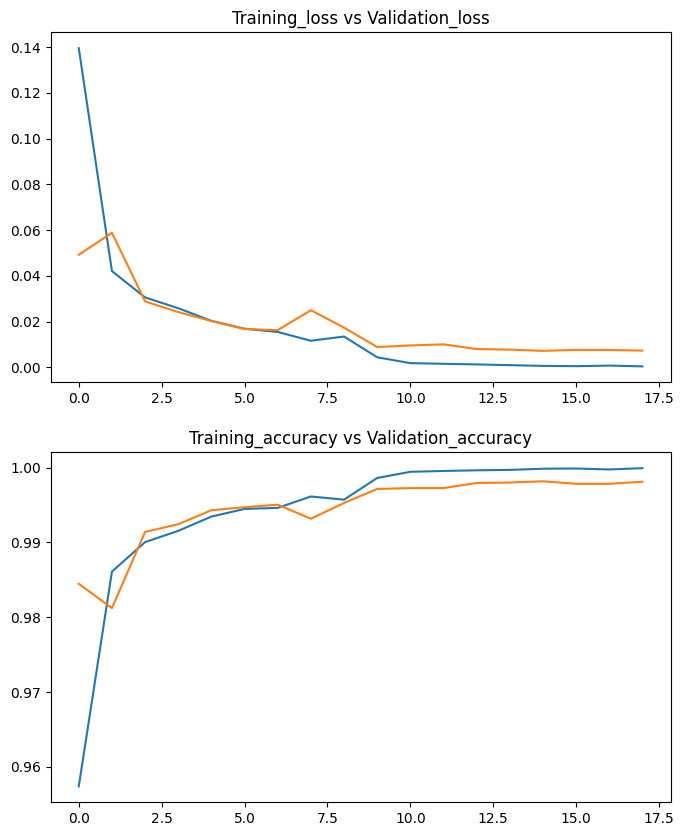

In [37]:
plot_history(history1)

In [38]:
feature_model.save('best_plant_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img


Text(0.5, 0.98, '(224, 224, 3)')

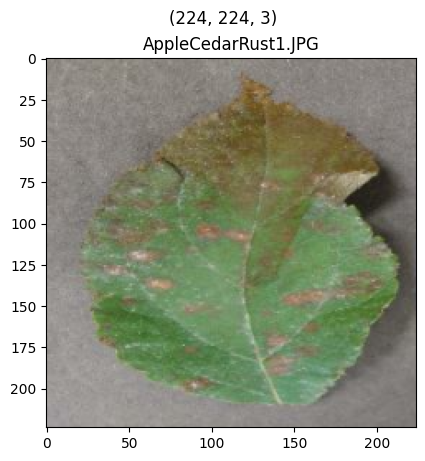

In [40]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust4.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)


In [41]:

pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred

1/1 [==============================] - 3s 3s/step


array([[2.5642254e-18, 5.3767546e-19, 1.0000000e+00, 1.3710891e-22,
        1.3582839e-28, 2.6992674e-16, 3.2449867e-25, 2.6088085e-21,
        3.4873244e-21, 9.6880102e-23, 5.3985427e-33, 5.5916251e-18,
        7.3390497e-16, 1.5145473e-20, 8.4780862e-24, 3.0873762e-18,
        3.2558141e-16, 9.9595471e-28, 6.0253469e-22, 2.3042494e-30,
        1.0054608e-18, 2.5404552e-21, 2.6275977e-34, 9.8597319e-24,
        1.7232861e-27, 8.4983171e-18, 1.6717173e-22, 1.4397778e-26,
        2.5792155e-18, 1.7877405e-21, 3.0796669e-21, 7.3991898e-28,
        8.0901201e-25, 1.3986385e-29, 1.9414480e-28, 1.1040843e-26,
        7.8517591e-30, 1.4213864e-27]], dtype=float32)

In [42]:
predicted_value = class_names[pred.argmax()]
predicted_value


'Apple___Cedar_apple_rust'

In [43]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 27ms/step


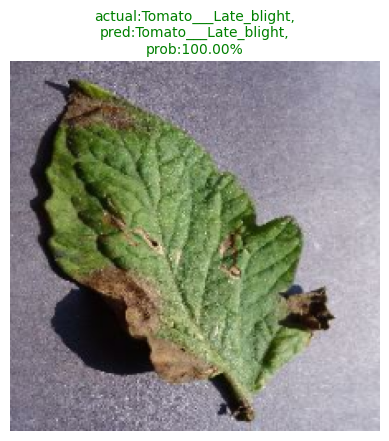

In [44]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 30ms/step


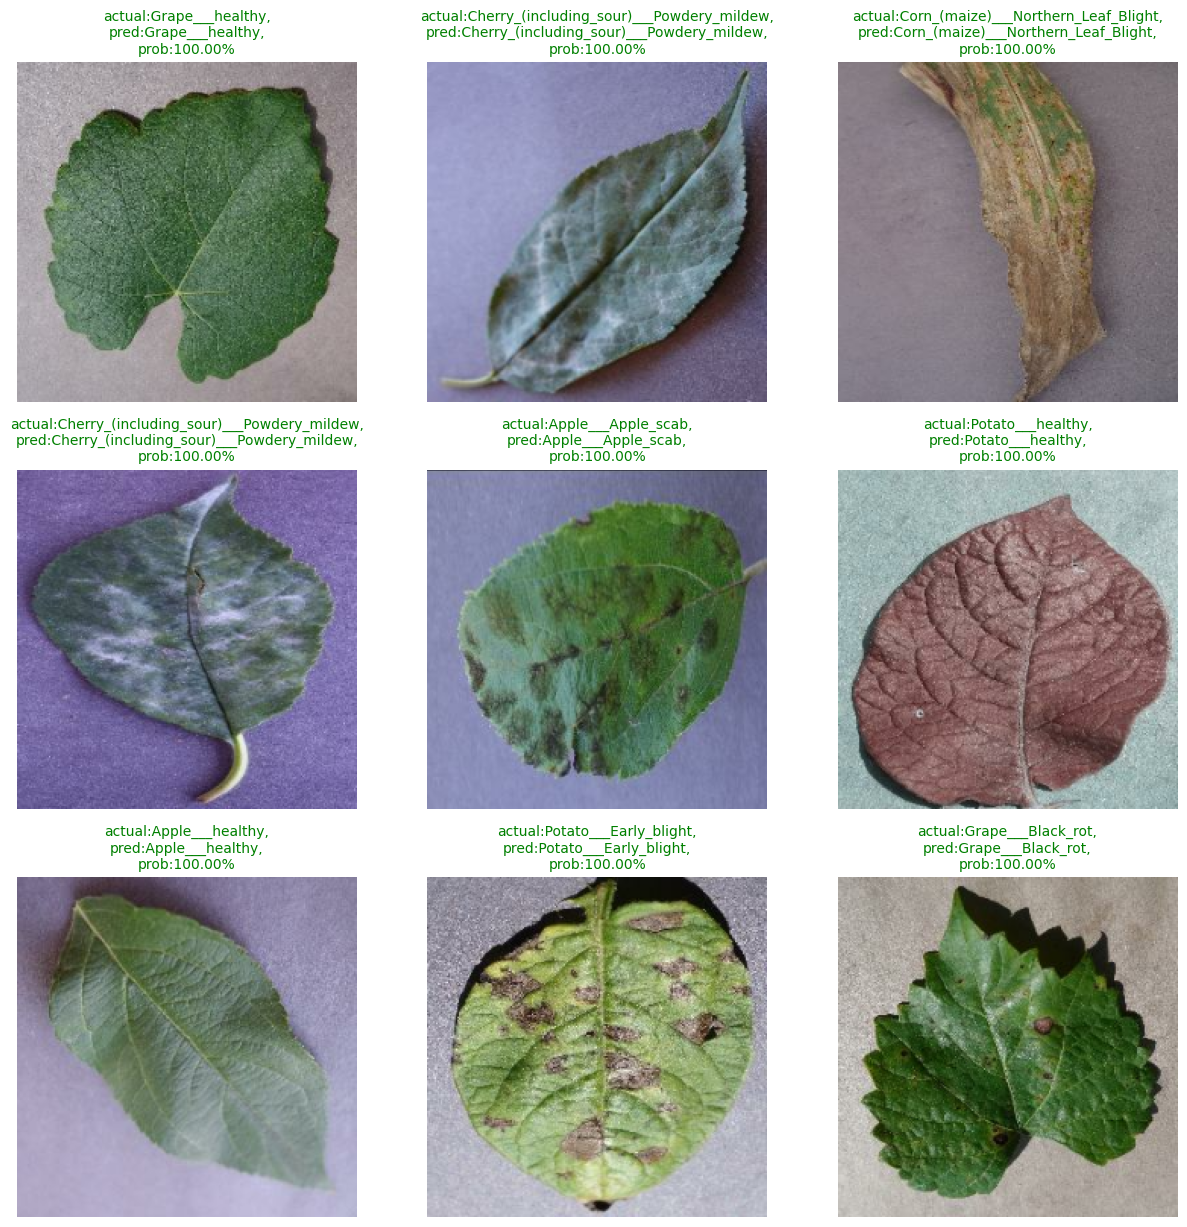

In [46]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 25ms/step


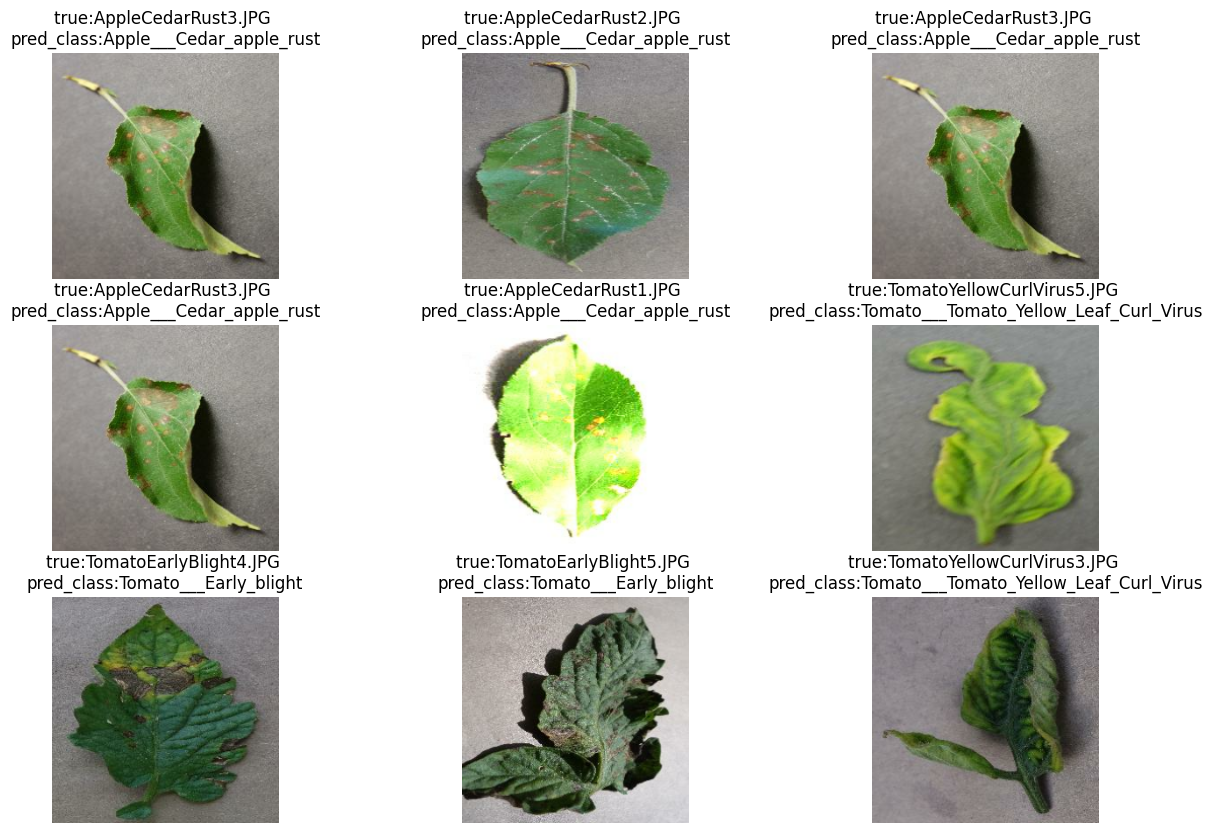

In [47]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)


lets download some image on google


In [48]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [49]:
!wget https://hortnews.extension.iastate.edu/files/resize/article/images/angular_leaf_spot_1_0-500x516.jpg

--2024-01-07 06:55:15--  https://hortnews.extension.iastate.edu/files/resize/article/images/angular_leaf_spot_1_0-500x516.jpg
Resolving hortnews.extension.iastate.edu (hortnews.extension.iastate.edu)... 129.186.90.87, 2610:130:108:480::81ba:5a57
Connecting to hortnews.extension.iastate.edu (hortnews.extension.iastate.edu)|129.186.90.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33835 (33K) [image/jpeg]
Saving to: ‘angular_leaf_spot_1_0-500x516.jpg’

angular_leaf_spot_1 100%[===================>]  33.04K   155KB/s    in 0.2s    

2024-01-07 06:55:16 (155 KB/s) - ‘angular_leaf_spot_1_0-500x516.jpg’ saved [33835/33835]



1/1 [==============================] - 0s 28ms/step


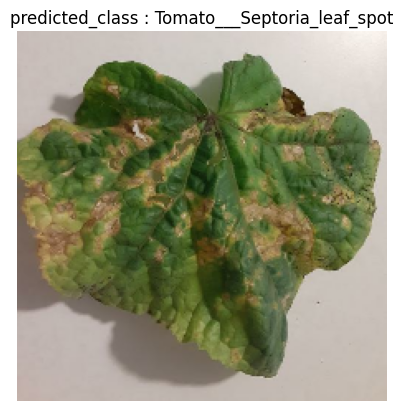

In [50]:
predict_img('angular_leaf_spot_1_0-500x516.jpg')

In [51]:
!wget https://ohioline.osu.edu/sites/ohioline/files/imce/Plant_Pathology/PLPATH-FRU-40-cherry-leaf-spot-figure-1.png

--2024-01-07 06:55:22--  https://ohioline.osu.edu/sites/ohioline/files/imce/Plant_Pathology/PLPATH-FRU-40-cherry-leaf-spot-figure-1.png
Resolving ohioline.osu.edu (ohioline.osu.edu)... 3.137.107.32, 3.136.189.186, 18.220.38.57, ...
Connecting to ohioline.osu.edu (ohioline.osu.edu)|3.137.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238115 (233K) [image/png]
Saving to: ‘PLPATH-FRU-40-cherry-leaf-spot-figure-1.png’

PLPATH-FRU-40-cherr 100%[===================>] 232.53K   359KB/s    in 0.6s    

2024-01-07 06:55:24 (359 KB/s) - ‘PLPATH-FRU-40-cherry-leaf-spot-figure-1.png’ saved [238115/238115]



1/1 [==============================] - 0s 25ms/step


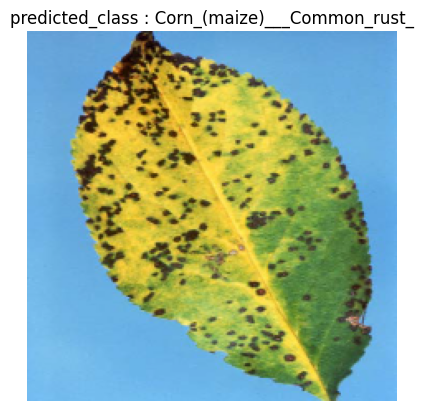

In [52]:
predict_img('PLPATH-FRU-40-cherry-leaf-spot-figure-1.png')

In [53]:
!wget https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg

--2024-01-07 06:55:31--  https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg
Resolving www.planetnatural.com (www.planetnatural.com)... 172.64.147.184, 104.18.40.72, 2606:4700:4400::ac40:93b8, ...
Connecting to www.planetnatural.com (www.planetnatural.com)|172.64.147.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99069 (97K) [image/jpeg]
Saving to: ‘potato-blight.jpg’

potato-blight.jpg   100%[===================>]  96.75K  --.-KB/s    in 0.003s  

2024-01-07 06:55:31 (33.9 MB/s) - ‘potato-blight.jpg’ saved [99069/99069]



1/1 [==============================] - 0s 25ms/step


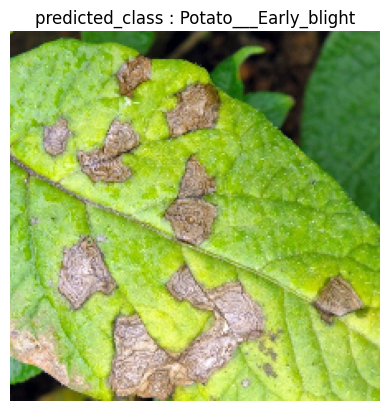

In [54]:
predict_img('potato-blight.jpg')

In [55]:
!wget https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

--2024-01-07 06:55:42--  https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg
Resolving content.peat-cloud.com (content.peat-cloud.com)... 13.33.33.27, 13.33.33.122, 13.33.33.52, ...
Connecting to content.peat-cloud.com (content.peat-cloud.com)|13.33.33.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20361 (20K) [image/jpeg]
Saving to: ‘black-rot-of-grape-grape-1575457334.jpg’

black-rot-of-grape- 100%[===================>]  19.88K  --.-KB/s    in 0.1s    

2024-01-07 06:55:43 (147 KB/s) - ‘black-rot-of-grape-grape-1575457334.jpg’ saved [20361/20361]



1/1 [==============================] - 0s 41ms/step


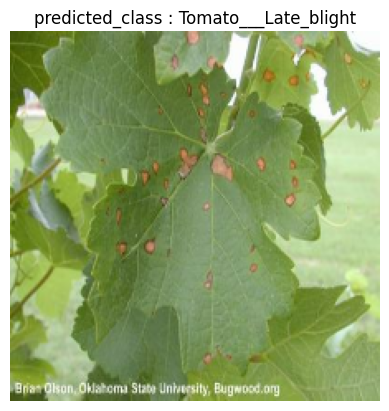

In [56]:
predict_img('black-rot-of-grape-grape-1575457334.jpg')

In [57]:
!wget https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

--2024-01-07 06:55:55--  https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28221 (28K) [image/jpeg]
Saving to: ‘Depositphotos_160089900_l-2015_large.jpg’

Depositphotos_16008 100%[===================>]  27.56K  --.-KB/s    in 0s      

2024-01-07 06:55:55 (156 MB/s) - ‘Depositphotos_160089900_l-2015_large.jpg’ saved [28221/28221]



1/1 [==============================] - 0s 27ms/step


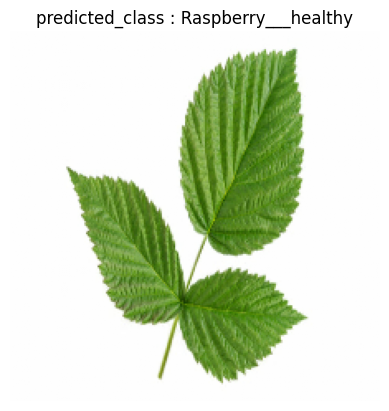

In [58]:
predict_img('Depositphotos_160089900_l-2015_large.jpg')

1/1 [==============================] - 0s 28ms/step


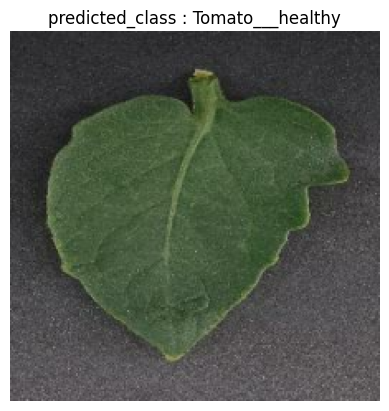

In [59]:
path='/content/new-plant-diseases-dataset/test/test/TomatoHealthy2.JPG'
predict_img(path)


In [60]:
!wget https://www.trianglegardener.com/wp-content/uploads/2018/09/Tar-spot-on-a-maple-Soukup-web.jpg

--2024-01-07 06:56:11--  https://www.trianglegardener.com/wp-content/uploads/2018/09/Tar-spot-on-a-maple-Soukup-web.jpg
Resolving www.trianglegardener.com (www.trianglegardener.com)... 34.120.190.48
Connecting to www.trianglegardener.com (www.trianglegardener.com)|34.120.190.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45087 (44K) [image/jpeg]
Saving to: ‘Tar-spot-on-a-maple-Soukup-web.jpg’

Tar-spot-on-a-maple 100%[===================>]  44.03K  --.-KB/s    in 0s      

2024-01-07 06:56:11 (143 MB/s) - ‘Tar-spot-on-a-maple-Soukup-web.jpg’ saved [45087/45087]



We have given Maple leaf which we havent trained , lets see the result

1/1 [==============================] - 0s 26ms/step


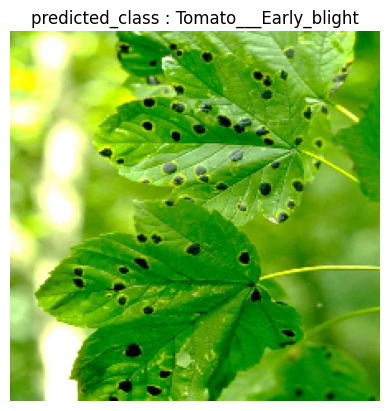

In [61]:
predict_img('Tar-spot-on-a-maple-Soukup-web.jpg')

In [62]:
!wget https://assets.syngentaebiz.com/images/GrayLeafSpotLow-Res.jpg

--2024-01-07 06:56:22--  https://assets.syngentaebiz.com/images/GrayLeafSpotLow-Res.jpg
Resolving assets.syngentaebiz.com (assets.syngentaebiz.com)... 52.222.144.61, 52.222.144.30, 52.222.144.17, ...
Connecting to assets.syngentaebiz.com (assets.syngentaebiz.com)|52.222.144.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57369 (56K) [image/jpeg]
Saving to: ‘GrayLeafSpotLow-Res.jpg’

GrayLeafSpotLow-Res 100%[===================>]  56.02K   273KB/s    in 0.2s    

2024-01-07 06:56:23 (273 KB/s) - ‘GrayLeafSpotLow-Res.jpg’ saved [57369/57369]



1/1 [==============================] - 0s 38ms/step


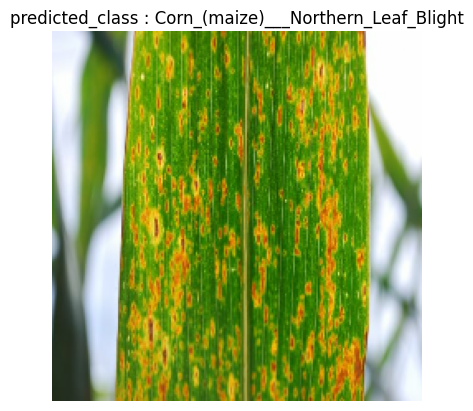

In [63]:
predict_img('GrayLeafSpotLow-Res.jpg')

In [65]:
predict_img('/4885431993_c2e3723542_o.jpg')

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /4885431993_c2e3723542_o.jpg; No such file or directory [Op:ReadFile]

1/1 [==============================] - 0s 40ms/step


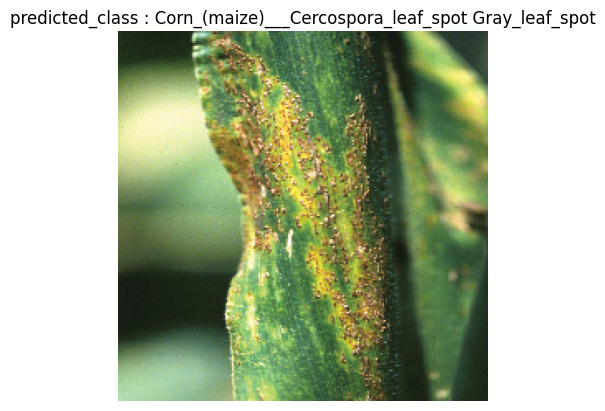

In [66]:
!wget https://www.missouribotanicalgarden.org/Portals/0/Gardening/Gardening%20Help/images/Pests/Leaf_Spot_of_Trees669.jpg

--2024-01-07 06:56:42--  https://www.missouribotanicalgarden.org/Portals/0/Gardening/Gardening%20Help/images/Pests/Leaf_Spot_of_Trees669.jpg
Resolving www.missouribotanicalgarden.org (www.missouribotanicalgarden.org)... 192.104.39.51
Connecting to www.missouribotanicalgarden.org (www.missouribotanicalgarden.org)|192.104.39.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25253 (25K) [image/jpeg]
Saving to: ‘Leaf_Spot_of_Trees669.jpg’

Leaf_Spot_of_Trees6 100%[===================>]  24.66K  59.4KB/s    in 0.4s    

2024-01-07 06:56:44 (59.4 KB/s) - ‘Leaf_Spot_of_Trees669.jpg’ saved [25253/25253]



1/1 [==============================] - 0s 27ms/step


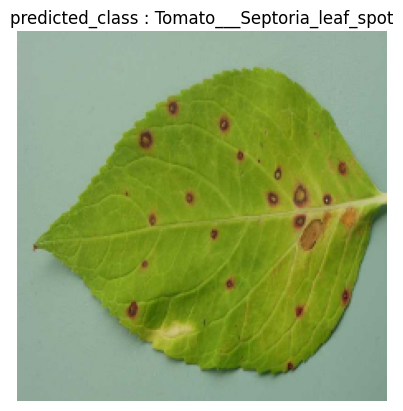

In [67]:
predict_img('Leaf_Spot_of_Trees669.jpg')